In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 경사 하강법 설명
1. 함수 정의
  - `gradient_descent`라는 이름의 함수를 정의합니다. 이 함수는 입력 데이터(X), 출력 데이터(y), 학습률(learning_rate), 반복 횟수(n_iterations)를 인자로 받습니다.

2. 샘플 수 확인
  - `m = len(X)`는 입력 데이터의 샘플 수를 변수 m에 저장합니다. 이는 데이터의 총 개수를 의미합니다.

3. 바이어스 항 추가
  - $X_b$ = `np.c_[np.ones((X.shape[0], 1)), X]`는 입력 데이터에 바이어스 항(즉, 항상 1인 추가 열)을 추가합니다. 바이어스 항은 모델이 더 유연하게 동작하도록 돕습니다.

4. 가중치 초기화
  - `theta = np.random.randn(X_b.shape[1], 1)`는 가중치 `theta`를 임의의 값으로 초기화합니다. 이는 모델이 학습할 때 조정할 값들입니다.

5. loss_history 초기화
  - `loss_history = []`는 손실 값을 저장할 빈 리스트를 초기화합니다. 이 리스트는 모델이 학습하면서 손실이 어떻게 변하는지 기록하는 데 사용됩니다.

6. 경사 하강법 반복 : `주어진 반복 횟수(`n_iterations`)만큼 다음 과정을 반복
  - `z = X_b.dot(theta)`는 현재 가중치를 사용하여 예측 값을 계산
  - `y_pred = sigmoid(z)`는 예측 값을 시그모이드 함수에 통과시켜 최종 예측 값을 얻습니다. 시그모이드 함수는 예측 값을 0과 1 사이의 값으로 변환
  - `gradients = X_b.T.dot(y_pred - y) / len(y)`는 예측 값과 실제 값의 차이를 사용하여 그래디언트를 계산합니다. 그래디언트는 손실 함수의 기울기이며, 가중치를 어떻게 조정할지 알려줍니다.
  - `theta = theta - learning_rate * gradients`는 학습률(`learning_rate`)을 사용하여 가중치를 업데이트 합니다.
  - `loss = compute_loss(y, y_pred)`  현재 예측 값과 실제 값 사이의 손실을 계산
  - `loss_history.append(loss)`는 계산된 손실 값을 손실 히스토리에 추가

## 비유를 통해 이해하기
- 이 과정을 산을 내려가는 것에 비유할 수 있습니다. 산 꼭대기에서 시작하여 가장 낮은 지점을 찾기 위해 아래로 내려가는 과정입니다.

  + `가중치 초기화`는 산 꼭대기에서 출발점을 정하는 것과 같습니다.

  + `손실 함수`는 우리가 얼마나 높은 지점에 있는지 알려주는 도구입니다.

  + `그래디언트`는 현재 위치에서 가장 가파르게 내려갈 방향을 가리킵니다.

  + `학습률`은 한 걸음에 얼마나 많이 내려갈지 결정합니다.

  + `반복`은 여러 번 걸음을 옮기면서 계속해서 산을 내려가는 과정입니다.

  + `결과 반환`은 우리가 최종적으로 도달한 위치와 그동안의 여정을 기록한 것입니다.



## 결과 비교
- AND 네트워크는 학습을 진행할수록 손실함수의 값이 줄어듬
- XOR 네트워크는 학습을 진행해도 손실함수의 값은 줄어들지 않음

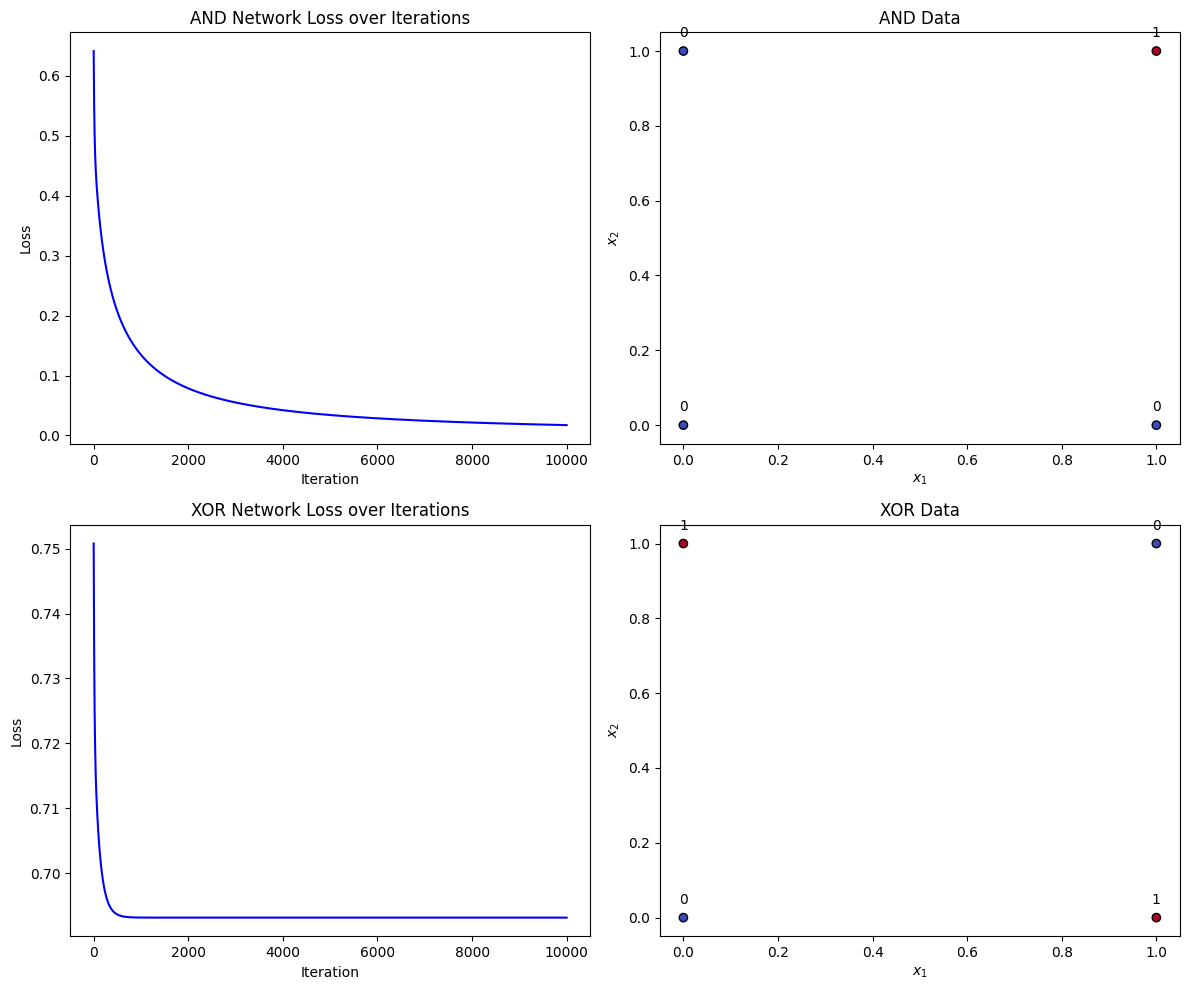

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# AND 데이터셋 정의
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# XOR 데이터셋 정의
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# 경사 하강법을 수행하고 손실을 계산하는 함수 정의
def gradient_descent(X, y, learning_rate=0.1, n_iterations=10000):
    m = len(X)  # 샘플 수
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 바이어스 항 추가
    theta = np.random.randn(X_b.shape[1], 1)  # 가중치를 임의의 값으로 초기화
    loss_history = []  # 손실 히스토리 초기화

    for iteration in range(n_iterations):
        z = X_b.dot(theta)  # 선형 모델의 출력 계산
        y_pred = sigmoid(z)  # 예측 값 계산
        gradients = X_b.T.dot(y_pred - y) / len(y)  # 그래디언트 계산
        theta = theta - learning_rate * gradients  # 가중치 업데이트
        loss = compute_loss(y, y_pred)  # 손실 계산
        loss_history.append(loss)  # 손실 히스토리에 추가

    return theta, loss_history  # 가중치와 손실 히스토리 반환

# 시그모이드 함수 정의
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 이진 교차 엔트로피 손실 함수 정의
def compute_loss(y_true, y_pred):
    m = len(y_true)
    return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# AND와 XOR 데이터셋에 대해 경사 하강법 수행
theta_and, loss_history_and = gradient_descent(X_and, y_and)
theta_xor, loss_history_xor = gradient_descent(X_xor, y_xor)

# 손실 및 데이터셋 플롯
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# AND 네트워크의 손실 변화를 플롯
ax[0, 0].plot(range(len(loss_history_and)), loss_history_and, color='blue')
ax[0, 0].set_xlabel('Iteration')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].set_title('AND Network Loss over Iterations')

# AND 데이터셋 플롯
ax[0, 1].scatter(X_and[:, 0], X_and[:, 1], c=y_and.ravel(), edgecolors='k', marker='o', cmap='coolwarm')
for i, txt in enumerate(y_and.ravel()):
    ax[0, 1].annotate(txt, (X_and[i, 0], X_and[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
ax[0, 1].set_xlabel('$x_1$')
ax[0, 1].set_ylabel('$x_2$')
ax[0, 1].set_title('AND Data')

# XOR 네트워크의 손실 변화를 플롯
ax[1, 0].plot(range(len(loss_history_xor)), loss_history_xor, color='blue')
ax[1, 0].set_xlabel('Iteration')
ax[1, 0].set_ylabel('Loss')
ax[1, 0].set_title('XOR Network Loss over Iterations')

# XOR 데이터셋 플롯
ax[1, 1].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor.ravel(), edgecolors='k', marker='o', cmap='coolwarm')
for i, txt in enumerate(y_xor.ravel()):
    ax[1, 1].annotate(txt, (X_xor[i, 0], X_xor[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
ax[1, 1].set_xlabel('$x_1$')
ax[1, 1].set_ylabel('$x_2$')
ax[1, 1].set_title('XOR Data')

plt.tight_layout()  # 플롯 레이아웃 조정
plt.show()  # 플롯 표시

# MLP without backpropagation

In [4]:
import numpy as np

# 간단한 데이터셋 생성
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([[0],
              [1],
              [1],
              [0]])

# MLP 파라미터
input_size = 2
hidden_size = 2
output_size = 1

# 가중치와 바이어스 초기화
np.random.seed(42)  # 재현성을 위해 시드 설정

# W1과 b1는 입력층과 은닉층 사이의 가중치와 바이어스입니다.
# W2와 b2는 은닉층과 출력층 사이의 가중치와 바이어스입니다.
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)

# 활성화 함수 (히든 레이어에 ReLU, 출력 레이어에 sigmoid 사용)
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def forward_pass(X, W1, b1, W2, b2):
  """
  하나의 은닉층을 가진 단순 다층 퍼셉트론(MLP)을 통해 순전파를 수행합니다.

  매개변수:
  X (numpy.ndarray): 입력 데이터로, 형태는 (샘플 수, 특징 수)입니다.
  W1 (numpy.ndarray): 입력층에서 은닉층으로의 가중치 행렬로, 형태는 (특징 수, 은닉층 뉴런 수)입니다.
  b1 (numpy.ndarray): 은닉층의 바이어스 벡터로, 형태는 (은닉층 뉴런 수,)입니다.
  W2 (numpy.ndarray): 은닉층에서 출력층으로의 가중치 행렬로, 형태는 (은닉층 뉴런 수, 출력층 뉴런 수)입니다.
  b2 (numpy.ndarray): 출력층의 바이어스 벡터로, 형태는 (출력층 뉴런 수,)입니다.

  반환값:
  numpy.ndarray: 순전파 후 MLP의 출력으로, 형태는 (샘플 수, 출력층 뉴런 수)입니다.
  """
  z1 = np.dot(X, W1) + b1  # 입력층에서 은닉층으로의 선형 변환
  a1 = relu(z1)  # 은닉층 활성화 함수 적용

  z2 = np.dot(a1, W2) + b2  # 은닉층에서 출력층으로의 선형 변환
  a2 = sigmoid(z2)  # 출력층 활성화 함수 적용

  return a2


# 순전파 수행
output = forward_pass(X, W1, b1, W2, b2)

# 결과 출력
print("Output of MLP forward pass:")
print(output)

Output of MLP forward pass:
[[0.38474066]
 [0.76363755]
 [0.48629467]
 [0.86424862]]


# 후진 모드 자동 미분
- 이 코드에서는 `Variable` 클래스를 통해 값과 로컬 그래디언트를 저장하고, 덧셈과 곱셈 연산을 정의하여 자동 미분을 수행합니다. 주요 함수와 클래스는 다음과 같습니다.

1. **Variable 클래스**
   - 변수의 값과 로컬 그래디언트를 저장합니다.
   - 덧셈 (`__add__`)과 곱셈 (`__mul__`) 연산을 지원합니다.

2. **add 함수**
   - 두 변수의 덧셈을 수행하고 로컬 그래디언트를 계산합니다.

3. **mul 함수**
   - 두 변수의 곱셈을 수행하고 로컬 그래디언트를 계산합니다.

4. **get_gradients 함수**
   - 주어진 변수에 대한 그래디언트를 계산합니다.
   - 내부적으로 `compute_gradients` 함수를 사용하여 그래디언트를 재귀적으로 계산합니다.

In [5]:
from collections import defaultdict

class Variable:
  def __init__(self, value, local_gradients=()):
      """
      Variable 클래스는 값과 로컬 그래디언트를 저장합니다.

      매개변수:
      value (float): 변수의 값.
      local_gradients (tuple): 로컬 그래디언트의 튜플.
      """
      self.value = value
      self.local_gradients = local_gradients

  def __add__(self, other):
      """
      변수의 덧셈 연산을 정의합니다.

      매개변수:
      other (Variable): 더할 다른 변수.

      반환값:
      Variable: 결과 변수.
      """
      return add(self, other)

  def __mul__(self, other):
      """
      변수의 곱셈 연산을 정의합니다.

      매개변수:
      other (Variable): 곱할 다른 변수.

      반환값:
      Variable: 결과 변수.
      """
      return mul(self, other)

def add(a, b):
  """
  두 변수의 덧셈을 수행하고 로컬 그래디언트를 계산합니다.

  매개변수:
  a (Variable): 첫 번째 변수.
  b (Variable): 두 번째 변수.

  반환값:
  Variable: 결과 변수.
  """
  value = a.value + b.value
  local_gradients = (
      (a, 1),
      (b, 1)
  )
  return Variable(value, local_gradients)

def mul(a, b):
  """
  두 변수의 곱셈을 수행하고 로컬 그래디언트를 계산합니다.

  매개변수:
  a (Variable): 첫 번째 변수.
  b (Variable): 두 번째 변수.

  반환값:
  Variable: 결과 변수.
  """
  value = a.value * b.value
  local_gradients = (
      (a, b.value),
      (b, a.value)
  )
  return Variable(value, local_gradients)

def get_gradients(variable):
  """
  변수의 그래디언트를 계산합니다.

  매개변수:
  variable (Variable): 그래디언트를 계산할 변수.

  반환값:
  dict: 변수에 대한 그래디언트 딕셔너리.
  """
  gradients = defaultdict(lambda: 0)

  def compute_gradients(variable, path_value):
      """
      변수에 대한 그래디언트를 재귀적으로 계산합니다.

      매개변수:
      variable (Variable): 그래디언트를 계산할 현재 변수.
      path_value (float): 현재 변수까지의 경로 값.

      설명:
      이 함수는 변수의 로컬 그래디언트를 사용하여 모든 자식 변수에 대한 그래디언트를 재귀적으로 계산합니다.
      로컬 그래디언트를 통해 자식 변수에 대한 경로 값을 업데이트하고,
      이를 다시 자식 변수의 그래디언트 계산에 사용합니다.
      """
      for child_variable, local_gradient in variable.local_gradients:
          value_of_path_to_child = path_value * local_gradient  # 자식 변수에 대한 경로 값 계산
          gradients[child_variable] += value_of_path_to_child  # 자식 변수의 그래디언트 업데이트
          compute_gradients(child_variable, value_of_path_to_child)  # 자식 변수에 대해 재귀적으로 그래디언트 계산

  compute_gradients(variable, path_value=1)  # 초기 경로 값 1로 시작
  return gradients

# 역전파

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# AND 데이터셋 정의
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([[0], [0], [0], [1]])

# XOR 데이터셋 정의
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([[0], [1], [1], [0]])

# 경사 하강법을 수행하고 손실을 계산하는 함수 정의
def gradient_descent(X, y, learning_rate=0.1, n_iterations=10000):
    """
    주어진 데이터셋에 대해 경사 하강법을 수행하여 가중치를 업데이트하고 손실을 계산합니다.

    매개변수:
    X (numpy.ndarray): 입력 데이터.
    y (numpy.ndarray): 출력 데이터.
    learning_rate (float): 학습률.
    n_iterations (int): 반복 횟수.

    반환값:
    tuple: 최종 가중치 (theta)와 손실 히스토리 (loss_history).
    """
    m = len(X)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 바이어스 항 추가
    theta = np.random.randn(X_b.shape[1], 1)  # 가중치를 임의의 값으로 초기화
    loss_history = []

    for iteration in range(n_iterations):
        z = X_b.dot(theta)  # 예측 값 계산
        y_pred = sigmoid(z)  # 시그모이드 함수 적용
        gradients = X_b.T.dot(y_pred - y) / len(y)  # 그래디언트 계산
        theta = theta - learning_rate * gradients  # 가중치 업데이트
        loss = compute_loss(y, y_pred)  # 손실 계산
        loss_history.append(loss)  # 손실 히스토리 기록

    return theta, loss_history

# 시그모이드 함수 정의
def sigmoid(z):
    """
    시그모이드 활성화 함수를 적용합니다.

    매개변수:
    z (numpy.ndarray): 입력 값.

    반환값:
    numpy.ndarray: 시그모이드 함수가 적용된 값.
    """
    return 1 / (1 + np.exp(-z))

# 이진 교차 엔트로피 손실 함수 정의
def compute_loss(y_true, y_pred):
    """
    이진 교차 엔트로피 손실을 계산합니다.

    매개변수:
    y_true (numpy.ndarray): 실제 값.
    y_pred (numpy.ndarray): 예측 값.

    반환값:
    float: 이진 교차 엔트로피 손실 값.
    """
    m = len(y_true)
    return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 단순 신경망 클래스 정의
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """
        단순 신경망을 초기화합니다.

        매개변수:
        input_size (int): 입력층의 뉴런 수.
        hidden_size (int): 은닉층의 뉴런 수.
        output_size (int): 출력층의 뉴런 수.
        """
        self.W1 = np.random.randn(input_size, hidden_size)  # 입력층에서 은닉층으로의 가중치 초기화
        self.b1 = np.random.randn(hidden_size)  # 은닉층의 바이어스 초기화
        self.W2 = np.random.randn(hidden_size, output_size)  # 은닉층에서 출력층으로의 가중치 초기화
        self.b2 = np.random.randn(output_size)  # 출력층의 바이어스 초기화

    def forward(self, X):
        """
        순전파를 수행합니다.

        매개변수:
        X (numpy.ndarray): 입력 데이터.

        반환값:
        numpy.ndarray: 출력 데이터.
        """
        self.Z1 = np.dot(X, self.W1) + self.b1  # 입력층에서 은닉층으로의 선형 변환
        self.A1 = sigmoid(self.Z1)  # 은닉층 활성화 함수 적용
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # 은닉층에서 출력층으로의 선형 변환
        self.A2 = sigmoid(self.Z2)  # 출력층 활성화 함수 적용
        return self.A2

    def backward(self, X, y, y_pred, learning_rate):
        """
        역전파를 수행하여 가중치와 바이어스를 업데이트합니다.

        매개변수:
        X (numpy.ndarray): 입력 데이터.
        y (numpy.ndarray): 실제 값.
        y_pred (numpy.ndarray): 예측 값.
        learning_rate (float): 학습률.
        """
        m = len(y)
        dZ2 = y_pred - y  # 출력층의 그래디언트 계산
        dW2 = np.dot(self.A1.T, dZ2) / m  # 은닉층에서 출력층으로의 가중치 그래디언트 계산
        db2 = np.sum(dZ2, axis=0) / m  # 출력층의 바이어스 그래디언트 계산
        dZ1 = np.dot(dZ2, self.W2.T) * self.A1 * (1 - self.A1)  # 은닉층의 그래디언트 계산
        dW1 = np.dot(X.T, dZ1) / m  # 입력층에서 은닉층으로의 가중치 그래디언트 계산
        db1 = np.sum(dZ1, axis=0) / m  # 은닉층의 바이어스 그래디언트 계산

        self.W1 -= learning_rate * dW1  # 가중치 업데이트
        self.b1 -= learning_rate * db1  # 바이어스 업데이트
        self.W2 -= learning_rate * dW2  # 가중치 업데이트
        self.b2 -= learning_rate * db2  # 바이어스 업데이트

    def train(self, X, y, learning_rate=0.1, n_iterations=10000):
        """
        주어진 데이터셋에 대해 신경망을 학습합니다.

        매개변수:
        X (numpy.ndarray): 입력 데이터.
        y (numpy.ndarray): 실제 값.
        learning_rate (float): 학습률.
        n_iterations (int): 반복 횟수.

        반환값:
        list: 손실 히스토리.
        """
        loss_history = []
        for iteration in range(n_iterations):
            y_pred = self.forward(X)  # 순전파 수행
            loss = compute_loss(y, y_pred)  # 손실 계산
            loss_history.append(loss)  # 손실 히스토리 기록
            self.backward(X, y, y_pred, learning_rate)  # 역전파 수행
        return loss_history

# XOR 데이터셋에 대해 로지스틱 회귀 경사 하강법 수행
theta_xor, loss_history_xor = gradient_descent(X_xor, y_xor)

# XOR 데이터셋에 대해 신경망 초기화 및 학습
nn_xor = SimpleNeuralNetwork(input_size=2, hidden_size=2, output_size=1)
loss_history_xor_nn = nn_xor.train(X_xor, y_xor)

# AND 데이터셋에 대해 경사 하강법 수행
theta_and, loss_history_and = gradient_descent(X_and, y_and)


- 역전파 적용

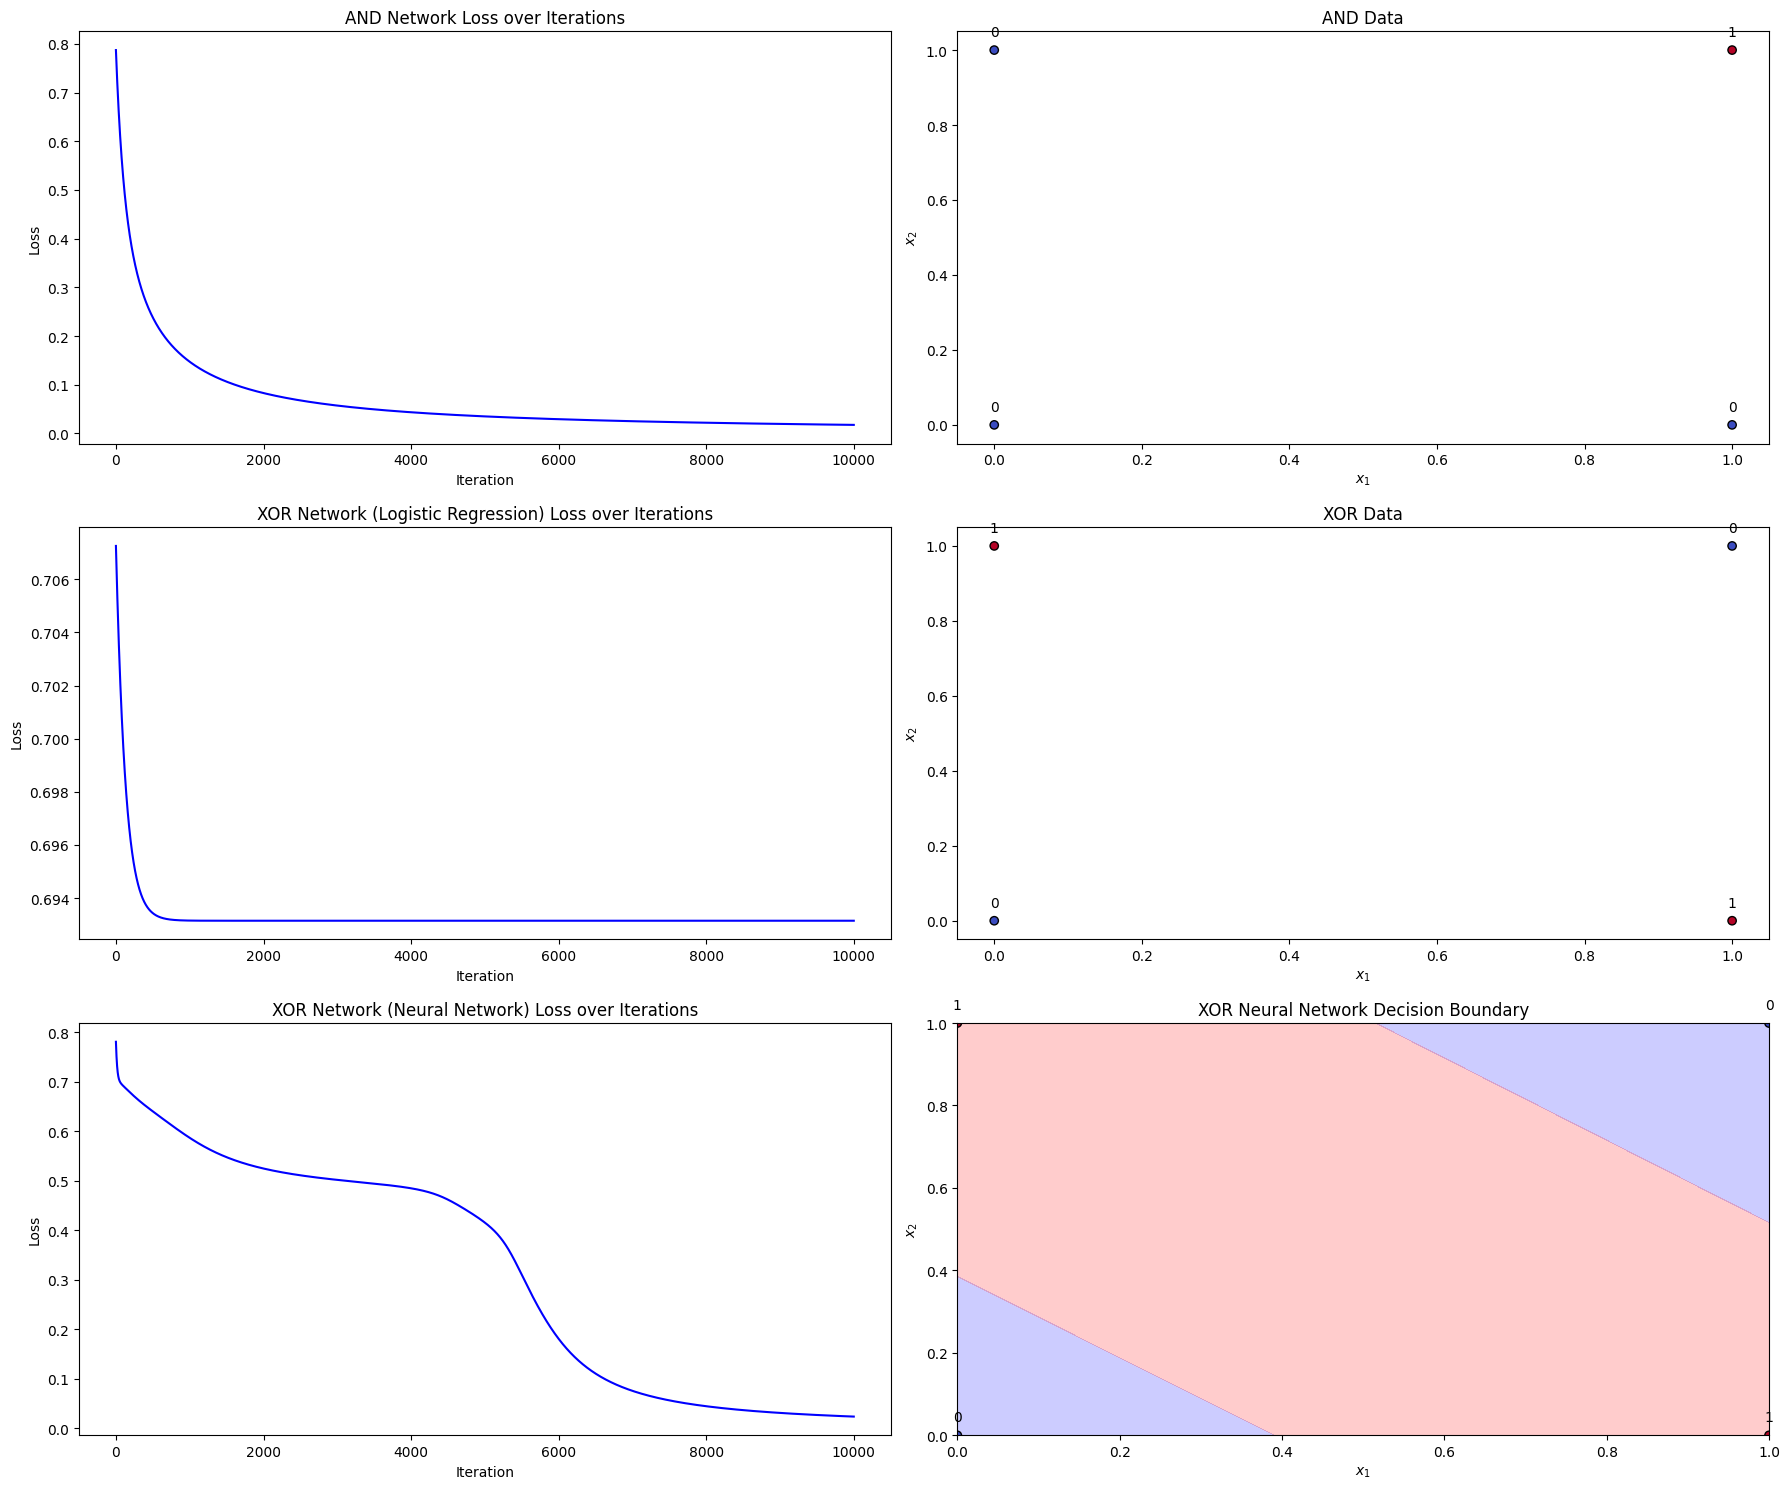

In [7]:
# 손실 및 데이터셋 플롯
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

# AND 네트워크의 손실 변화를 플롯
ax[0, 0].plot(range(len(loss_history_and)), loss_history_and, color='blue')
ax[0, 0].set_xlabel('Iteration')
ax[0, 0].set_ylabel('Loss')
ax[0, 0].set_title('AND Network Loss over Iterations')

# AND 데이터셋 플롯
ax[0, 1].scatter(X_and[:, 0], X_and[:, 1], c=y_and.ravel(), edgecolors='k', marker='o', cmap='coolwarm')
for i, txt in enumerate(y_and.ravel()):
    ax[0, 1].annotate(txt, (X_and[i, 0], X_and[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
ax[0, 1].set_xlabel('$x_1$')
ax[0, 1].set_ylabel('$x_2$')
ax[0, 1].set_title('AND Data')

# 로지스틱 회귀로 XOR 네트워크의 손실 변화를 플롯
ax[1, 0].plot(range(len(loss_history_xor)), loss_history_xor, color='blue')
ax[1, 0].set_xlabel('Iteration')
ax[1, 0].set_ylabel('Loss')
ax[1, 0].set_title('XOR Network (Logistic Regression) Loss over Iterations')

# XOR 데이터셋 플롯
ax[1, 1].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor.ravel(), edgecolors='k', marker='o', cmap='coolwarm')
for i, txt in enumerate(y_xor.ravel()):
    ax[1, 1].annotate(txt, (X_xor[i, 0], X_xor[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
ax[1, 1].set_xlabel('$x_1$')
ax[1, 1].set_ylabel('$x_2$')
ax[1, 1].set_title('XOR Data')

# 신경망으로 XOR 네트워크의 손실 변화를 플롯
ax[2, 0].plot(range(len(loss_history_xor_nn)), loss_history_xor_nn, color='blue')
ax[2, 0].set_xlabel('Iteration')
ax[2, 0].set_ylabel('Loss')
ax[2, 0].set_title('XOR Network (Neural Network) Loss over Iterations')

# 신경망 결정 경계 플롯
xx, yy = np.meshgrid(np.arange(0, 1.01, 0.01), np.arange(0, 1.01, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
preds = nn_xor.forward(grid)
preds = preds.reshape(xx.shape)
ax[2, 1].contourf(xx, yy, preds, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])
ax[2, 1].scatter(X_xor[:, 0], X_xor[:, 1], c=y_xor.ravel(), edgecolors='k', marker='o', cmap='coolwarm')
for i, txt in enumerate(y_xor.ravel()):
    ax[2, 1].annotate(txt, (X_xor[i, 0], X_xor[i, 1]), textcoords="offset points", xytext=(0,10), ha='center')
ax[2, 1].set_xlabel('$x_1$')
ax[2, 1].set_ylabel('$x_2$')
ax[2, 1].set_title('XOR Neural Network Decision Boundary')

plt.tight_layout()
plt.show()

# MLP Comparison (NumPy vs Tensorflow)
- Tensorflow를 쓰는 이유 : GPU 연산!
- 모델의 성능 속도 비교

## Step 1. Create an MLP with numpy

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import time

# 데이터셋 생성
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # y를 열 벡터로 변환
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터셋을 학습용과 검증용으로 분할

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import time
import tensorflow as tf

# 데이터셋 생성
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # y를 열 벡터로 변환
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)  # 데이터셋을 학습용과 검증용으로 분할

# 단순 다층 퍼셉트론(MLP) 클래스 정의
class SimpleMLP:
    """
    단순 다층 퍼셉트론(MLP) 클래스

    매개변수:
    input_size (int): 입력층의 뉴런 수
    hidden_size (int): 은닉층의 뉴런 수
    output_size (int): 출력층의 뉴런 수

    메서드:
    forward(X): 순전파를 수행하여 출력값을 계산합니다.
    sigmoid(z): 시그모이드 활성화 함수를 적용합니다.
    compute_loss(y_true, y_pred): 이진 교차 엔트로피 손실을 계산합니다.
    backward(X, y, y_pred, learning_rate): 역전파를 수행하여 가중치와 바이어스를 업데이트합니다.
    train(X, y, X_val, y_val, learning_rate, n_iterations): 모델을 학습시키고 손실 히스토리를 반환합니다.
    """
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)  # 입력층에서 은닉층으로의 가중치 초기화
        self.b1 = np.zeros(hidden_size)  # 은닉층의 바이어스 초기화
        self.W2 = np.random.randn(hidden_size, output_size)  # 은닉층에서 출력층으로의 가중치 초기화
        self.b2 = np.zeros(output_size)  # 출력층의 바이어스 초기화

        # Adam 옵티마이저를 위한 매개변수 초기화
        self.mW1, self.vW1 = np.zeros_like(self.W1), np.zeros_like(self.W1)
        self.mb1, self.vb1 = np.zeros_like(self.b1), np.zeros_like(self.b1)
        self.mW2, self.vW2 = np.zeros_like(self.W2), np.zeros_like(self.W2)
        self.mb2, self.vb2 = np.zeros_like(self.b2), np.zeros_like(self.b2)
        self.beta1, self.beta2 = 0.9, 0.999
        self.epsilon = 1e-8
        self.t = 0

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1  # 입력층에서 은닉층으로의 선형 변환
        self.A1 = self.sigmoid(self.Z1)  # 은닉층 활성화 함수 적용
        self.Z2 = np.dot(self.A1, self.W2) + self.b2  # 은닉층에서 출력층으로의 선형 변환
        self.A2 = self.sigmoid(self.Z2)  # 출력층 활성화 함수 적용
        return self.A2

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y_true, y_pred):
        m = len(y_true)
        return -1/m * np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def backward(self, X, y, y_pred, learning_rate):
        m = len(y)
        dZ2 = y_pred - y  # 출력층의 그래디언트 계산
        dW2 = np.dot(self.A1.T, dZ2) / m  # 은닉층에서 출력층으로의 가중치 그래디언트 계산
        db2 = np.sum(dZ2, axis=0) / m  # 출력층의 바이어스 그래디언트 계산
        dZ1 = np.dot(dZ2, self.W2.T) * self.A1 * (1 - self.A1)  # 은닉층의 그래디언트 계산
        dW1 = np.dot(X.T, dZ1) / m  # 입력층에서 은닉층으로의 가중치 그래디언트 계산
        db1 = np.sum(dZ1, axis=0) / m  # 은닉층의 바이어스 그래디언트 계산

        # Adam 옵티마이저를 사용한 가중치와 바이어스 업데이트
        self.t += 1  # 시간 스텝 증가
        self.mW1 = self.beta1 * self.mW1 + (1 - self.beta1) * dW1
        self.vW1 = self.beta2 * self.vW1 + (1 - self.beta2) * (dW1 ** 2)
        mW1_hat = self.mW1 / (1 - self.beta1 ** self.t)
        vW1_hat = self.vW1 / (1 - self.beta2 ** self.t)
        self.W1 -= learning_rate * mW1_hat / (np.sqrt(vW1_hat) + self.epsilon)

        self.mb1 = self.beta1 * self.mb1 + (1 - self.beta1) * db1
        self.vb1 = self.beta2 * self.vb1 + (1 - self.beta2) * (db1 ** 2)
        mb1_hat = self.mb1 / (1 - self.beta1 ** self.t)
        vb1_hat = self.vb1 / (1 - self.beta2 ** self.t)
        self.b1 -= learning_rate * mb1_hat / (np.sqrt(vb1_hat) + self.epsilon)

        self.mW2 = self.beta1 * self.mW2 + (1 - self.beta1) * dW2
        self.vW2 = self.beta2 * self.vW2 + (1 - self.beta2) * (dW2 ** 2)
        mW2_hat = self.mW2 / (1 - self.beta1 ** self.t)
        vW2_hat = self.vW2 / (1 - self.beta2 ** self.t)
        self.W2 -= learning_rate * mW2_hat / (np.sqrt(vW2_hat) + self.epsilon)

        self.mb2 = self.beta1 * self.mb2 + (1 - self.beta1) * db2
        self.vb2 = self.beta2 * self.vb2 + (1 - self.beta2) * (db2 ** 2)
        mb2_hat = self.mb2 / (1 - self.beta1 ** self.t)
        vb2_hat = self.vb2 / (1 - self.beta2 ** self.t)
        self.b2 -= learning_rate * mb2_hat / (np.sqrt(vb2_hat) + self.epsilon)

    def train(self, X, y, X_val, y_val, learning_rate=0.001, n_iterations=10000):
        train_loss_history = []  # 학습 손실 히스토리
        val_loss_history = []  # 검증 손실 히스토리
        for iteration in range(n_iterations):
            y_pred = self.forward(X)  # 순전파 수행
            train_loss = self.compute_loss(y, y_pred)  # 학습 손실 계산
            train_loss_history.append(train_loss)  # 학습 손실 히스토리 기록
            self.backward(X, y, y_pred, learning_rate)  # 역전파 수행

            y_val_pred = self.forward(X_val)  # 검증 데이터에 대한 예측 수행
            val_loss = self.compute_loss(y_val, y_val_pred)  # 검증 손실 계산
            val_loss_history.append(val_loss)  # 검증 손실 히스토리 기록
        return train_loss_history, val_loss_history

# Numpy MLP 학습 및 시간 측정
mlp_numpy = SimpleMLP(input_size=2, hidden_size=5, output_size=1)

start_time_numpy = time.time()
train_loss_history_numpy, val_loss_history_numpy = mlp_numpy.train(X_train, y_train, X_val, y_val, learning_rate=0.001, n_iterations=1000)

time_numpy = time.time() - start_time_numpy  # 학습 시간 계산

## Step 2. Tensorflow

In [9]:
import tensorflow as tf

# TensorFlow 모델 생성 및 컴파일
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),  # 첫 번째 은닉층, 뉴런 수를 증가하고 ReLU 활성화 함수 사용
    tf.keras.layers.Dense(10, activation='relu'),  # 두 번째 은닉층 추가
    tf.keras.layers.Dense(5, activation='relu'),  # 세 번째 은닉층 추가
    tf.keras.layers.Dense(1, activation='sigmoid')  # 출력층
])
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # 모델 컴파일

# TensorFlow 모델 학습 시간 측정
start_time_tf = time.time()
history_tf = model_tf.fit(X_train, y_train, epochs=10000, validation_data=(X_val, y_val), verbose=0)  # 모델 학습
time_tf = time.time() - start_time_tf  # 학습 시간 계산

# 학습 시간 출력
print(f"Training time (Numpy MLP): {time_numpy:.2f} seconds")
print(f"Training time (TensorFlow MLP): {time_tf:.2f} seconds")

KeyboardInterrupt: 

# Step 3. Plot the training and validation loss

In [ ]:
# 두 모델의 반복에 따른 손실을 플롯팅
fig, ax = plt.subplots(3, 2, figsize=(18, 15))

# Numpy MLP의 학습 손실 플롯
ax[0, 0].plot(range(len(train_loss_history_numpy)), train_loss_history_numpy, color='blue')
ax[0, 0].set_xlabel('Iteration')  # x축 레이블 설정
ax[0, 0].set_ylabel('Loss')  # y축 레이블 설정
ax[0, 0].set_title('Numpy MLP Training Loss over Iterations')  # 플롯 제목 설정

# Numpy MLP의 검증 손실 플롯
ax[0, 1].plot(range(len(val_loss_history_numpy)), val_loss_history_numpy, color='blue')
ax[0, 1].set_xlabel('Iteration')  # x축 레이블 설정
ax[0, 1].set_ylabel('Loss')  # y축 레이블 설정
ax[0, 1].set_title('Numpy MLP Validation Loss over Iterations')  # 플롯 제목 설정

# TensorFlow MLP의 학습 손실 플롯
ax[1, 0].plot(history_tf.history['loss'], color='red')
ax[1, 0].set_xlabel('Epoch')  # x축 레이블 설정
ax[1, 0].set_ylabel('Loss')  # y축 레이블 설정
ax[1, 0].set_title('TensorFlow MLP Training Loss over Epochs')  # 플롯 제목 설정

# TensorFlow MLP의 검증 손실 플롯
ax[1, 1].plot(history_tf.history['val_loss'], color='red')
ax[1, 1].set_xlabel('Epoch')  # x축 레이블 설정
ax[1, 1].set_ylabel('Loss')  # y축 레이블 설정
ax[1, 1].set_title('TensorFlow MLP Validation Loss over Epochs')  # 플롯 제목 설정

# Numpy MLP의 결정 경계 플롯
xx, yy = np.meshgrid(np.arange(-1.5, 2.5, 0.01), np.arange(-1, 1.5, 0.01))
grid = np.c_[xx.ravel(), yy.ravel()]
preds_numpy = mlp_numpy.forward(grid)  # Numpy MLP로 예측 수행
preds_numpy = preds_numpy.reshape(xx.shape)
ax[2, 0].contourf(xx, yy, preds_numpy, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])  # 결정 경계 플롯
ax[2, 0].scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o', cmap='coolwarm')  # 데이터 포인트 플롯
ax[2, 0].set_xlabel('$x_1$')  # x축 레이블 설정
ax[2, 0].set_ylabel('$x_2$')  # y축 레이블 설정
ax[2, 0].set_title('Numpy MLP Decision Boundary')  # 플롯 제목 설정

# TensorFlow MLP의 결정 경계 플롯
preds_tf = model_tf.predict(grid).reshape(xx.shape)  # TensorFlow MLP로 예측 수행
ax[2, 1].contourf(xx, yy, preds_tf, levels=[0, 0.5, 1], alpha=0.2, colors=['blue', 'red'])  # 결정 경계 플롯
ax[2, 1].scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o', cmap='coolwarm')  # 데이터 포인트 플롯
ax[2, 1].set_xlabel('$x_1$')  # x축 레이블 설정
ax[2, 1].set_ylabel('$x_2$')  # y축 레이블 설정
ax[2, 1].set_title('TensorFlow MLP Decision Boundary')  # 플롯 제목 설정

plt.tight_layout()  # 레이아웃 조정
plt.show()  # 플롯 표시

# 이미지 처리

- 화소 처리

In [ ]:
#!pip install opencv-python

import cv2
print(cv2.__version__)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
import cv2

img_url = "/content/drive/MyDrive/Colab Notebooks/2024/한국표준협회/인공지능 신경망과 컴퓨터 비전 이해하기 (9월)/images/fruits-2.jpg"

image = cv2.imread(img_url)

# Displaying an image in a window
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt

img_url = "/content/drive/MyDrive/Colab Notebooks/iM_alphaco/딥러닝/images/fruits-2.jpg"

image = cv2.imread(img_url)
cv2_imshow(image)

- 아래 코드는 Github에 있는 소스코드를 가져와서 사용자 정의 함수로 만든 코드
- 주요 코드 요약
  + 값을 0과 255 사이로 클리핑:
    - 이미지 데이터의 값이 유효한 범위(0-255) 내에 있는지 확인하며, 유효 범위를 벗어난 값을 클리핑하고, 데이터 타입을 uint8로 변환합니다.
  + 컬러 변환 처리
    - `a.ndim == 3` : 이미지가 3차원 배열(컬러 이미지)인지 확인
      - BGRA를 RGBA로 변환 : 이미지가 4채널(BGRA 형식)이면 OpenCV의 cv2.cvtColor를 사용하여 RGBA 형식으로 변환합니다.
      - BGR을 RGB로 변환 : 이미지가 3채널(BGR 형식)이면 BGR(OpenCV의 기본 컬러 형식)에서 RGB(Matplotlib에서 사용하는 표준 형식)로 변환합니다.
    - 이미지가 2차원 배열(`a.ndim == 2`)이면 흑백 이미지로 간주하여 별도의 컬러 변환을 하지 않습니다.
  - Matplotlib의 imshow를 사용하여 이미지를 표시합니다. 이미지가 흑백이면 'gray' 컬러맵을 적용하고, 그렇지 않으면 RGB 이미지를 표시합니다.

In [ ]:
import matplotlib.pyplot as plt

def cv2_imshow(title, a):
    """A replacement for cv2.imshow() for use in Jupyter notebooks using Matplotlib.

    Args:
        title: str, optional. The title of the image to be displayed.
        a : np.ndarray. shape (N, M) or (N, M, 1) is an NxM grayscale image.
            shape (N, M, 3) is an NxM BGR color image. shape (N, M, 4) is an NxM BGRA color image.
    """
    a = a.clip(0, 255).astype('uint8')
    # cv2 stores colors as BGR; convert to RGB
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    elif a.ndim == 2:
        # If it's grayscale, don't convert to RGB
        pass

    plt.imshow(a, cmap='gray' if a.ndim == 2 else None)
    if title is not None:
        plt.title(title)
    plt.axis('off')  # Hide axes for better display
    plt.show()

In [ ]:
image = cv2.imread(img_url)
cv2_imshow("hello", image)

- 화소 처리

In [ ]:
# from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def mat_access1(mat):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            k = mat[i, j]  # 원소 접근 - mat1[i][j] 방식도 가능
            mat[i, j] = k * 2  # 원소 할당

def mat_access2(mat):
    for i in range(mat.shape[0]):
        for j in range(mat.shape[1]):
            k = mat.item(i, j)  # 원소 접근
            mat.itemset((i, j), k * 2)  # 원소 할당

mat1 = np.arange(10).reshape(2, 5)
mat2 = np.arange(10).reshape(2, 5)

print("원소 처리 전: \n%s\n" % mat1)
mat_access1(mat1)
print("원소 처리 후: \n%s\n" % mat1)

print("원소 처리 전: \n%s\n" % mat2)
mat_access2(mat2)
print("원소 처리 후: \n%s" % mat2)

In [ ]:
import numpy as np, cv2, time

def pixel_access1(image):
    image1 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i,j]                  # 화소 접근
            image1[i, j] =  255 - pixel            # 화소 할당
    return image1

def pixel_access2(image):
    image2 = np.zeros(image.shape[:2], image.dtype)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image.item(i, j)  # 화소 접근
            image2.itemset((i, j),  255 - pixel)  # 화소 할당
    return image2

def pixel_access3(image):
    lut = [255 - i for i in range(256)]  # 룩업테이블 생성
    lut = np.array(lut, np.uint8)
    image3 = lut[image]
    return image3

def pixel_access4(image):
    image4 = cv2.subtract(255, image)
    return image4

def pixel_access5(image):
    image5 = 255 - image
    return image5

url = "/content/drive/MyDrive/Colab Notebooks/iM_alphaco/딥러닝/"

image = cv2.imread(url + "images/bright.jpg", cv2.IMREAD_GRAYSCALE)
if image is None: raise Exception("영상 파일 읽기 오류 발생")

# 수행시간 체크
def time_check(func, msg):
    start_time = time.perf_counter()
    ret_img = func(image)
    elapsed = (time.perf_counter() - start_time) * 1000
    print(msg, "수행시간 : %.2f ms" % elapsed)
    return ret_img

image1 = time_check(pixel_access1, "[방법 1] 직접 접근 방식")
image2 = time_check(pixel_access2, "[방법 2] item() 함수 방식")
image3 = time_check(pixel_access3, "[방법 3] 룩업 테이블 방식")
image4 = time_check(pixel_access4, "[방법 4] OpenCV 함수 방식")
image5 = time_check(pixel_access5, "[방법 5] ndarray 연산 방식")

# 결과 영상 보기
cv2_imshow("image  - original", image)
cv2_imshow("image1 - directly access to pixel", image1)
cv2_imshow("image2 - item()/itemset()", image2)
cv2_imshow("image3 - LUT", image3)
cv2_imshow("image4 - OpenCV", image4)
cv2_imshow("image5 - ndarray 방식", image5)

### 그레이 스케일(명암도) 영상
- 하나의 화소값은 0~255의 값을 가짐
- 0은 검은색을, 255는 흰색을 의미

In [ ]:
image1 = np.zeros((50, 512), np.uint8)         # 50 x 512 영상 생성
image2 = np.zeros((50, 512), np.uint8)

rows, cols = image1.shape[:2]

for i in range(rows):                           # 행렬 전체 조회
    for j in range(cols):
        image1[i, j]= j // 2                # 화소값 점진적 증가
        image2[i, j]= j // 20 * 10          # 계단 현상 증가

cv2_imshow("image1", image1)

In [ ]:
cv2_imshow("image2", image2)

### 영상의 화소 표현
- 파일을 읽어 들여서 영상의 특정 부분의 화소 확인

In [ ]:
image = cv2.imread(url + "images/pixel.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

(x,y),(w,h) = (180, 37), (15, 10)                   # 좌표는 x, y
roi_img = image[y:y+h, x:x+w]                   # 행렬 접근은 y, x

# print(“[roi_img] =\n”, roi_img) # 행렬 원소 바로 출력 가능
print("[roi_img] =")
for row in roi_img:
    for p in row:
        print("%4d" % p, end="")       # 행렬 원 하나 출력
    print()

cv2.rectangle(image, (x,y, w,h), 255, 1)
cv2_imshow("image", image)

## **영상 밝기의 가감 연산**

- OpenCV의 Saturation 방식
- NumPy의 Module 방식의 차이 이해

In [ ]:
import cv2

image = cv2.imread(url + "images/bright.jpg", cv2.IMREAD_GRAYSCALE)    # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

# OpenCV 함수 이용
dst1 = cv2.add(image, 200)                  # 영상 밝게 saturation 방식
dst2 = cv2.subtract(image, 200)             # 영상 어둡게

# numpy array 이용
dst3 = image + 100                          # 영상 밝게 modulo 방식
dst4 = image - 100                          # 영상 어둡게

cv2_imshow("original image", image)
cv2_imshow("dst1- bright: OpenCV", dst1)
cv2_imshow("dst2- dark: OpenCV", dst2)
cv2_imshow("dst3- bright: numpy", dst3)
cv2_imshow("dst4- dark: numpy", dst4);

## 행렬 덧셈 및 곱셈을 이용한 영상 합성

In [ ]:
import numpy as np, cv2

image1 = cv2.imread(url + "images/add1.jpg", cv2.IMREAD_GRAYSCALE)   # 영상 읽기
image2 = cv2.imread(url + "images/add2.jpg", cv2.IMREAD_GRAYSCALE)
if image1 is None or image2 is None: raise Exception("영상 파일 읽기 오류 발생")

# 영상 합성
alpha, beta = 0.6, 0.7                                        # 곱샘 비율
add_img1 = cv2.add(image1 , image2)                            # 두 영상 단순 더하기
add_img2 = cv2.add(image1 * alpha , image2 * beta)             # 두영상 비율에 따른 더하기
add_img2 = np.clip(add_img2, 0, 255).astype("uint8")           # saturation 처리
add_img3 = cv2.addWeighted(image1, alpha, image2, beta, 0)     # 두영상 비율에 따른 더하기

titles = ['image1','image2','add_img1','add_img2','add_img3']
for t in titles:
  cv2_imshow(t, eval(t))

## 히스토그램

- 관측값의 개수를 겹치지 않는 다양한 계급으로 표시하는 것

In [ ]:
# -*- coding: utf-8 -*-
import numpy as np
import cv2, time

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        roi = (x, 0, w, int(h))
        cv2.rectangle(hist_img, roi, 0, cv2.FILLED)
    return cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환


def make_palate(rows):
    hue = [round(i * 180 / rows) for i in range(rows)]  # hue 값 리스트 계산
    hsv = [[(h, 255, 255)] for h in hue]                # (hue, 255,255) 화소값 계산
    hsv = np.array(hsv, np.uint8)                       # numpy 행렬의 uint8형 변환
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)         # HSV 컬러 -> BGR 컬러

# 색상으로 히스토그램 그리기
def draw_histo_hue(hist, shape=(200, 256,3)):
    hsv_palate = make_palate(hist.shape[0])                      # 색상 팔레트 생성
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)    # 정규화
    gap = hist_img.shape[1] / hist.shape[0]  # 한 계급 크기

    for i, h in enumerate(hist):
        x, w = int(round(i * gap)), int(round(gap))
        if h > 0:
            color = tuple(map(int, hsv_palate[i][0]))                    # 정수형 튜플로 변환
            cv2.rectangle(hist_img, (x,0, w,int(h) ), color , cv2.FILLED) # 팔레트 색으로 그리기

    return cv2.flip(hist_img, 0)

## 영상 히스토그램 계산
- 0~255까지의 모든 화소값에 대해 출현 빈도수를 누적하여 배열에 저장

In [ ]:
import numpy as np, cv2

def calc_histo(image, hsize, ranges=[0, 256]):  # 행렬 원소의 1차원 히스토그램 계산
    hist = np.zeros((hsize, 1), np.float32)  # 히스토그램 누적 행렬
    gap = ranges[1]/hsize  # 계급 간격

    for i in (image/gap).flat:
        hist[int(i)] += 1
    return hist

image = cv2.imread(url + "images/pixel.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류 발생")

hsize, ranges = [32], [0, 256]  # 히스토그램 간격수, 값 범위
hist = calc_histo(image, hsize[0], ranges)  # 사용자 정의 히스토그램 계산

print("사용자 정의 함수: \n", hist.flatten())  # 행렬을 벡터로 변환하여 출력
cv2_imshow("image", image)

## OpenCV 함수 활용 히스토그램 그래프 그리기

In [ ]:
import numpy as np, cv2

def draw_histo(hist, shape=(200, 256)):
    hist_img = np.full( shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)
    gap = hist_img.shape[1]/hist.shape[0]             # 한 계급 너비

    for i, h in enumerate(hist.flat):
        x = int(round(i * gap))                         # 막대 사각형 시작 x 좌표
        w = int(round(gap))
        cv2.rectangle(hist_img, (x, 0, w, int(h)), 0, cv2.FILLED)
    return   cv2.flip(hist_img, 0)                        # 영상 상하 뒤집기 후 반환

image = cv2.imread(url + "images/draw_hist.jpg", cv2.IMREAD_GRAYSCALE)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

hist = cv2.calcHist([image], [0], None, [32], [0, 256])
hist_img = draw_histo(hist)

cv2_imshow("image", image)
cv2_imshow("hist_img", hist_img)

## 색상 히스토그램 그리기

In [ ]:
import numpy as np, cv2

def make_palette(rows):
    # 리스트 생성 방식
    hue = np.arange(0, rows ) / rows * 180
    hsv = [[(h, 255, 255)] for h in hue]                # (hue, 255,255) 화소값 계산
    hsv = np.array(hsv, np.uint8)                       # numpy 행렬의 uint8형 변환

    # ndarray 생성 방식
    # hsv = np.full((rows, 1, 3), 255, np.uint8)
    # hsv[:, 0, 0] = np.arange(0, rows ) / rows * 180
    # 반복문 방식
    # hsv = np.full((rows, 1, 3), 255, np.uint8)
    # for i in range(0, rows):                           # 행수만큼 반복
    #     hsv[i, 0, 0] = round(i / rows * 180 )         # HSV 컬러 지정
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)         # HSV 컬러 -> BGR 컬러

def draw_histo_hue(hist, shape=(200, 256,3)):
    hsv_palate = make_palette(hist.shape[0])                      # 색상 팔레트 생성
    hist_img = np.full(shape, 255, np.uint8)
    cv2.normalize(hist, hist, 0, shape[0], cv2.NORM_MINMAX)    # 정규화

    gap = hist_img.shape[1] / hist.shape[0]  # 한 계급 크기
    for i, h in enumerate(hist.flat):
        x, w = int(round(i * gap)), int(round(gap))
        color = tuple(map(int, hsv_palate[i][0]))                    # 정수형 튜플로 변환
        cv2.rectangle(hist_img, (x,0,w,int(h)), color , cv2.FILLED) # 팔레트 색으로 그리기
    return cv2.flip(hist_img, 0)

image = cv2.imread(url + "images/hue_hist.jpg", cv2.IMREAD_COLOR)  # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

hsv_img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)   # BGR 컬러 -> HSV 컬러
hue_hist = cv2.calcHist( [hsv_img], [0], None, [18], [0,180])       # Hue 채널 히스토그램 계산
hue_hist_img = draw_histo_hue(hue_hist, (200, 360, 3)) # 히스토그램 그래프

cv2_imshow("image", image)
cv2_imshow("hue_hist_img", hue_hist_img)

## **히스토그램 스트레칭**

- 영상이 보기에 선명하고 깨끗해 보이려면 어두운 부분에서 밝은 부분까지 고루 분되어야 함
- 히스토그램의 분포가 바뀐다는 것은 영상 내의 화소값의 분포가 바뀐다는 것을 의미함

In [ ]:
import numpy as np, cv2

def search_value_idx(hist, bias = 0):
    for i in range(hist.shape[0]):
        idx = np.abs(bias - i)                     # 검색 위치 (처음 또는 마지막)
        if hist[idx] > 0:  return idx                             # 위치 반환
    return -1                                      # 대상 없으면 반환

image = cv2.imread(url + "images/hist_stretch.jpg", cv2.IMREAD_GRAYSCALE)   # 영상읽기
if image is None: raise Exception("영상 파일 읽기 오류")

bsize, ranges = [64], [0,256]                        # 계급 개수 및 화소 범위
hist = cv2.calcHist([image], [0], None, bsize, ranges)

bin_width  = ranges[1]/bsize[0]                      # 계급 너비
high = search_value_idx(hist, bsize[0] - 1) * bin_width
low  = search_value_idx(hist, 0) * bin_width

idx = np.arange(0, 256)
idx = (idx - low) * 255/(high-low)	# 수식 적용하여 인덱스 생성
idx[0:int(low)] = 0
idx[int(high+1):] = 255

dst = cv2.LUT(image, idx.astype('uint8'))
# dst = idx.astype('uint8')[image]                #

## 룩업 테이블 사용하지 않고 직접 구현
# dst = np.zeros(image.shape, dtype=image.dtype)
# for i in range(dst.shape[0]):
#     for j in range(dst.shape[1]):
#         dst[i,j] = idx[image[i,j]]

hist_dst = cv2.calcHist([dst], [0], None, bsize, ranges)  # 결과 영상 히스토그램 재계산
hist_img = draw_histo(hist, (200,360))          # 원본 영상 히스토그램 그리기
hist_dst_img = draw_histo(hist_dst,(200,360))  # 결과 영상 히스토그램 그리기

print("high_value = ", high)
print("low_value = " , low)
cv2_imshow("image", image);         cv2_imshow("hist_img", hist_img)
cv2_imshow("dst", dst);             cv2_imshow("hist_dst_img", hist_dst_img)
cv2.waitKey(0)

## 히스토그램 평활화
- 평활화(Equalization)
- 인간의 눈은 영상의 밝기의 크기보다 대비가 증가할 때 인지도가 향상됨

In [ ]:
import numpy as np, cv2

image = cv2.imread(url + "images/equalize.jpg", cv2.IMREAD_GRAYSCALE) # 영상 읽기
if image is None: raise Exception("영상 파일 읽기 오류")

bins, ranges = [256], [0, 256]
hist = cv2.calcHist([image], [0], None, bins, ranges)    # 히스토그램 계산

# 히스토그램 누적합 계산
accum_hist = np.zeros(hist.shape[:2], np.float32)
accum_hist[0] = hist[0]
for i in range(1, hist.shape[0]):
    accum_hist[i] = accum_hist[i - 1] + hist[i]

accum_hist = (accum_hist / sum(hist)) * 255                 # 누적합의 정규화
dst1 = [[accum_hist[val] for val in row] for row in image] # 화소값 할당
dst1 = np.array(dst1, np.uint8)

# numpy 함수 사용
#accum_hist = np.cumsum(hist)                      # 누적합 계산
#cv2.normalize(accum_hist, accum_hist, 0, 255, cv2.NORM_MINMAX)  # 정규화

dst1 = cv2.LUT(image, accum_hist.astype("uint8"))  #룩업 테이블로 화소값할당
# dit1 = image[accum_hist.astype('uint8')]         # 파이썬 방식 록업테이블
dst2 = cv2.equalizeHist(image)                # OpenCV 히스토그램 평활화

hist1 = cv2.calcHist([dst1], [0], None, bins, ranges)   # 히스토그램 계산
hist2 = cv2.calcHist([dst2], [0], None, bins, ranges)   # 히스토그램 계산
hist_img = draw_histo(hist)
hist_img1 = draw_histo(hist1)
hist_img2 = draw_histo(hist2)

cv2_imshow("image", image);             cv2_imshow("hist_img", hist_img)
cv2_imshow("dst1_User", dst1);          cv2_imshow("User_hist", hist_img1)
cv2_imshow("dst2_OpenCV", dst2);        cv2_imshow("OpenCV_hist", hist_img2)

## 컬러 공간 변환

In [ ]:
import numpy as np, cv2

BGR_img = cv2.imread(url + "images/color_model.jpg", cv2.IMREAD_COLOR) # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

white = np.array([255, 255, 255], np.uint8)
CMY_img = white - BGR_img
Cyan, Magenta, Yellow = cv2.split(CMY_img) # 채널 분리

titles = ['BGR_img','CMY_img','Cyan','Magenta','Yellow']
[cv2_imshow(t, eval(t)) for t in titles]

## BGR ⇒ CMYK 변환

In [ ]:
import numpy as np, cv2

BGR_img = cv2.imread(url + "images/color_model.jpg", cv2.IMREAD_COLOR) # 컬러 영상 읽기
if BGR_img is None: raise Exception("영상 파일 읽기 오류")

white = np.array([255, 255, 255], np.uint8)
CMY_img = white - BGR_img
CMY = cv2.split(CMY_img) # 채널 분리

black = cv2.min(CMY[0], cv2.min(CMY[1], CMY[2])) # 원소 간의 최솟값 저장
Yellow, Magenta, Cyan = CMY - black

titles = ['black','Yellow','Magenta','Cyan']
[cv2_imshow(t, eval(t)) for t in titles]

# 여기서부터 오후 코드 작성
- 직접 타이핑한 코드들
- 이전까진 복붙이 주요.

In [ ]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

## 주요 라이브러리

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# MLP 코드 만들기
- 다층 퍼셉트론을 의미한다.

## 데이터 가져오기
- 또 Tips 데이터

In [ ]:
tips = sns.load_dataset('tips')
tips.head(2)

## 특성과 타겟 분리

In [ ]:
y = tips['tip']
X = tips.drop('tip', axis = 1)
X.shape, y.shape

## 수치형 - 범주형 칼럼 구분
- 파이프라인 구축 시 전처리 위함

In [ ]:
num_features = X.select_dtypes(include = np.number).columns.tolist()
cat_features = X.select_dtypes(exclude = np.number).columns.tolist()

num_features

## 파이프라인 - 전처리까지만
- preprocessor, cloumntransfomer

In [ ]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(sparse_output=False), cat_features)
    ])

- 데이터 전처리 실행

In [ ]:
X_transformed = preprocessor.fit_transform(X)
X_transformed

## 학습 데이터와 테스트 데이터 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size = 0.2, random_state = 42
)

## 모델 만들기
- MLP

In [ ]:
# Step 1. 모델 아키텍쳐 생성
model = Sequential([
    #입력층
    Dense(64, activation = 'relu', input_shape=(X_train.shape[1],)),
    #은닉층
    Dense(32, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(8, activation = 'relu'),
    #출력층
    Dense(1)
])

# Step 2. 모델 컴파일
model.compile(
    optimizer = 'adam', # ADAM 옵티마이저 사용
    loss = 'mse',       # 평균제곱오차 손실 함수
    metrics = ['mae']   # 평균 절대 오차로 성능 평가
)

# Step 3. 과적합 방지용 장치 설정 : EarlyStopping
# XGBoost, LGBM, CatBoost에도 존재함.
# 이론적으로 경사하강법이 존재

early_stopping = EarlyStopping(
    monitor = 'val_loss', # 검증 손실을 모니터링
    patience = 10,        # 10 에포크동안 개선이 없으면 학습 중단
    restore_best_weights = True, # 가장 좋은 가중치 복원
    verbose = 1           # 조기종료 메시지 출력
)

# Step 4. 모델 학습

history = model.fit(
    X_train, y_train, epochs = 100, batch_size = 32,
    validation_split = 0.2, #검증데이터 비율
    callbacks = [early_stopping],
    verbose = 1 # 학습과정 출력
)

## 모델 예측 및 결과 확인

In [ ]:
y_pred = model.predict(X_test)
y_pred[0]

In [ ]:
mae = np.mean(y_pred.flatten() - y_test)
mae

In [ ]:
# 학습 과정 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='학습 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('시간에 따른 모델 손실')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.show()

- 샘플 예시

In [ ]:
sample = X_test[0:1]
sample

In [ ]:
prediction = model.predict(sample)[0][0]
actual = y_test.iloc[0]
print(f"예측값: {prediction}, 실제값: {actual}")

## 텐서플로 다운그레이드

In [ ]:
!pip install tensorflow==2.15.0